In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

In [9]:
data0 = np.genfromtxt('Raw Ionomics Data_F1 pop.csv',delimiter = ',', skip_header = 2)
data0 = pd.DataFrame(data0)
data = data0.drop(data0.columns[0],axis = 1)
plt.rcParams['figure.figsize'] = (20,10)

In [10]:
data

,1,2,3,4,5,6,7,8,9,10,...,12,13,14,15,16,17,18,19,20,21
0,0.012870,18.666730,6.970224,1746.445345,3.845879,1743.118142,1152.944236,5888.311451,15894.22342,27.593398,...,0.188765,0.813897,7.365774,22.069698,0.004604,0.078727,2.939850,7.347059,0.101190,0.007666
1,0.011932,14.476929,5.866392,1489.852688,5.825639,2244.684250,1600.441818,7013.400166,13155.45463,35.491586,...,0.282940,0.648419,8.068232,10.108661,0.005610,-0.043177,4.166140,6.890243,0.145499,0.021108
2,0.021232,14.713134,10.251955,1467.666224,8.036047,2311.056644,1039.097749,7966.273447,14182.50581,39.134345,...,0.204521,0.555300,8.369120,24.304910,0.005812,-0.099479,4.589772,9.025915,0.161182,0.006237
3,0.023306,20.106299,11.773697,2248.108976,9.482051,2315.675046,1091.607046,7514.088622,22550.82189,40.220412,...,0.201085,0.660282,9.385392,17.753157,0.004598,0.033616,3.461935,15.292360,0.163046,0.006882
4,0.058813,12.978005,11.043837,3390.636514,29.329605,1995.192533,1096.870563,7608.463923,15982.76017,75.236138,...,0.353460,2.024096,9.068968,16.656839,0.013593,0.122611,4.690905,13.901449,0.184344,0.008106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,0.013316,18.748084,7.241536,3346.827794,5.973387,2508.863664,872.168401,5575.859103,25698.73968,31.940670,...,0.123662,0.648625,8.696161,17.628736,0.005386,0.130372,3.685086,16.473273,0.151210,0.005012
214,0.011018,27.557412,5.646738,3133.745701,4.148424,2173.914833,1075.422784,6923.877402,23631.46137,33.956219,...,0.120592,0.481312,7.546654,21.099165,0.007521,0.361999,7.250898,16.954597,0.104782,0.010632
215,0.006641,18.271167,6.660632,2058.059737,1.934820,2498.975455,1414.350000,9027.711359,16838.61005,24.943438,...,0.081795,0.436018,10.143454,21.347241,0.002030,0.111207,5.354436,8.852955,0.174862,0.005174
216,0.027518,12.297046,11.747990,2708.098373,12.501892,1543.348981,876.775433,4467.910281,17207.84861,39.775555,...,0.131645,0.561454,6.641192,11.868519,0.007891,0.091507,2.441251,11.219189,0.130510,0.004342


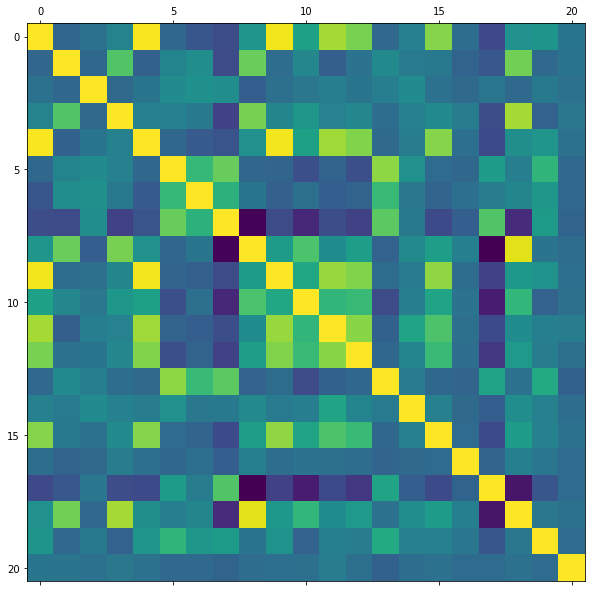

In [11]:
plt.matshow(data.corr())

In [12]:
z = pd.DataFrame(np.arange(4796).reshape(218,22))
z = z.astype('float32')
z.drop(z.columns[0],axis = 1, inplace = True )

In [22]:
for x in range(1,(data.shape[1]+1)):
    mean = data[x].mean()
    stdev = data[x].std()
    for y in range(data.shape[0]):
        zscore = (data[x][y] - mean)/stdev
        z[x][y] = zscore
z

,1,2,3,4,5,6,7,8,9,10,...,12,13,14,15,16,17,18,19,20,21
0,-0.203343,-0.052892,-0.328720,-1.076708,-0.339461,-1.440503,-0.496516,-1.042336,-0.263837,-0.296432,...,0.949205,1.082790,-1.209826,0.643763,-0.354193,-0.071162,-1.078875,-0.991246,-1.310961,-0.081850
1,-0.247432,-0.996063,-0.400122,-1.524713,-0.120257,-0.197745,0.839423,-0.397475,-0.786418,0.120650,...,2.406955,0.400043,-0.713868,-0.964548,-0.148505,-0.077465,-0.649630,-1.104259,-0.340064,0.356009
2,0.189571,-0.942891,-0.116440,-1.563450,0.124485,-0.033290,-0.836389,0.148677,-0.590447,0.313015,...,1.193086,0.015847,-0.501432,0.944315,-0.107113,-0.080376,-0.501344,-0.575911,0.003576,-0.128398
3,0.287060,0.271171,-0.018005,-0.200815,0.284590,-0.021847,-0.679630,-0.110499,1.006299,0.370367,...,1.139905,0.448989,0.216090,0.063350,-0.355410,-0.073494,-0.896127,0.974357,0.044428,-0.107386
4,1.955504,-1.333487,-0.065217,1.794012,2.482159,-0.815924,-0.663916,-0.056407,-0.246944,2.219456,...,3.498543,6.075937,-0.007316,-0.084064,1.483811,-0.068893,-0.465944,0.630257,0.511095,-0.067503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,-0.182368,-0.034578,-0.311170,1.717523,-0.103898,0.456827,-1.334732,-1.221422,1.606948,-0.066864,...,-0.058548,0.400895,-0.270530,0.046620,-0.194219,-0.068492,-0.818016,1.266505,-0.214926,-0.168301
214,-0.290344,1.948499,-0.414330,1.345487,-0.305962,-0.373094,-0.727945,-0.448787,1.212494,0.039571,...,-0.106074,-0.289421,-1.082119,0.513262,0.242217,-0.056516,0.430144,1.385581,-1.232261,0.014777
215,-0.496024,-0.141938,-0.348746,-0.532637,-0.551058,0.432326,0.283873,0.757055,-0.083640,-0.436370,...,-0.706609,-0.476300,0.751306,0.546619,-0.880355,-0.069483,-0.233685,-0.618700,0.303323,-0.163031
216,0.484958,-1.486779,-0.019668,0.602316,0.618954,-1.935481,-1.320978,-1.856458,-0.013186,0.346875,...,0.065019,0.041235,-1.721405,-0.727913,0.317888,-0.070501,-1.253402,-0.033313,-0.668497,-0.190139


In [23]:
for x in range(1,(z.shape[1]+1)): # counts through columns
    if z[x].kurt() > 16:
        cutoff = z[x].quantile(.9)
        for y in range(z.shape[0]): #counts through rows
            if z[x][y] > cutoff:
                z[x][y] = 'NaN'
z

,1,2,3,4,5,6,7,8,9,10,...,12,13,14,15,16,17,18,19,20,21
0,-0.203343,-0.052892,-0.328720,-1.076708,-0.339461,-1.440503,-0.496516,-1.042336,-0.263837,-0.296432,...,0.949205,1.082790,-1.209826,0.643763,-0.354193,-0.071162,-1.078875,-0.991246,-1.310961,-0.081850
1,-0.247432,-0.996063,-0.400122,-1.524713,-0.120257,-0.197745,0.839423,-0.397475,-0.786418,0.120650,...,2.406955,0.400043,-0.713868,-0.964548,-0.148505,-0.077465,-0.649630,-1.104259,-0.340064,NaN
2,0.189571,-0.942891,-0.116440,-1.563450,0.124485,-0.033290,-0.836389,0.148677,-0.590447,0.313015,...,1.193086,0.015847,-0.501432,0.944315,-0.107113,-0.080376,-0.501344,-0.575911,0.003576,-0.128398
3,0.287060,0.271171,-0.018005,-0.200815,0.284590,-0.021847,-0.679630,-0.110499,1.006299,0.370367,...,1.139905,0.448989,0.216090,0.063350,-0.355410,-0.073494,-0.896127,0.974357,0.044428,-0.107386
4,NaN,-1.333487,-0.065217,1.794012,NaN,-0.815924,-0.663916,-0.056407,-0.246944,NaN,...,3.498543,6.075937,-0.007316,-0.084064,1.483811,-0.068893,-0.465944,0.630257,0.511095,-0.067503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,-0.182368,-0.034578,-0.311170,1.717523,-0.103898,0.456827,-1.334732,-1.221422,1.606948,-0.066864,...,-0.058548,0.400895,-0.270530,0.046620,-0.194219,-0.068492,-0.818016,1.266505,-0.214926,-0.168301
214,-0.290344,1.948499,-0.414330,1.345487,-0.305962,-0.373094,-0.727945,-0.448787,1.212494,0.039571,...,-0.106074,-0.289421,-1.082119,0.513262,0.242217,-0.056516,0.430144,1.385581,-1.232261,0.014777
215,-0.496024,-0.141938,-0.348746,-0.532637,-0.551058,0.432326,0.283873,0.757055,-0.083640,-0.436370,...,-0.706609,-0.476300,0.751306,0.546619,-0.880355,-0.069483,-0.233685,-0.618700,0.303323,-0.163031
216,0.484958,-1.486779,-0.019668,0.602316,0.618954,-1.935481,-1.320978,-1.856458,-0.013186,0.346875,...,0.065019,0.041235,-1.721405,-0.727913,0.317888,-0.070501,-1.253402,-0.033313,-0.668497,-0.190139


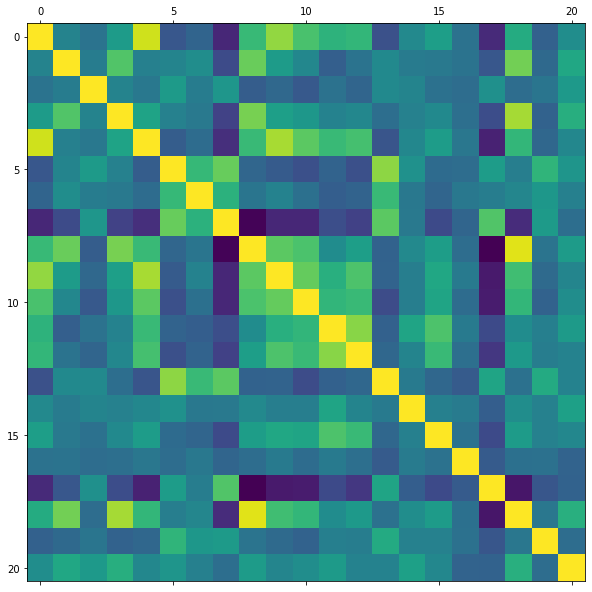

In [24]:
plt.matshow(z.corr())

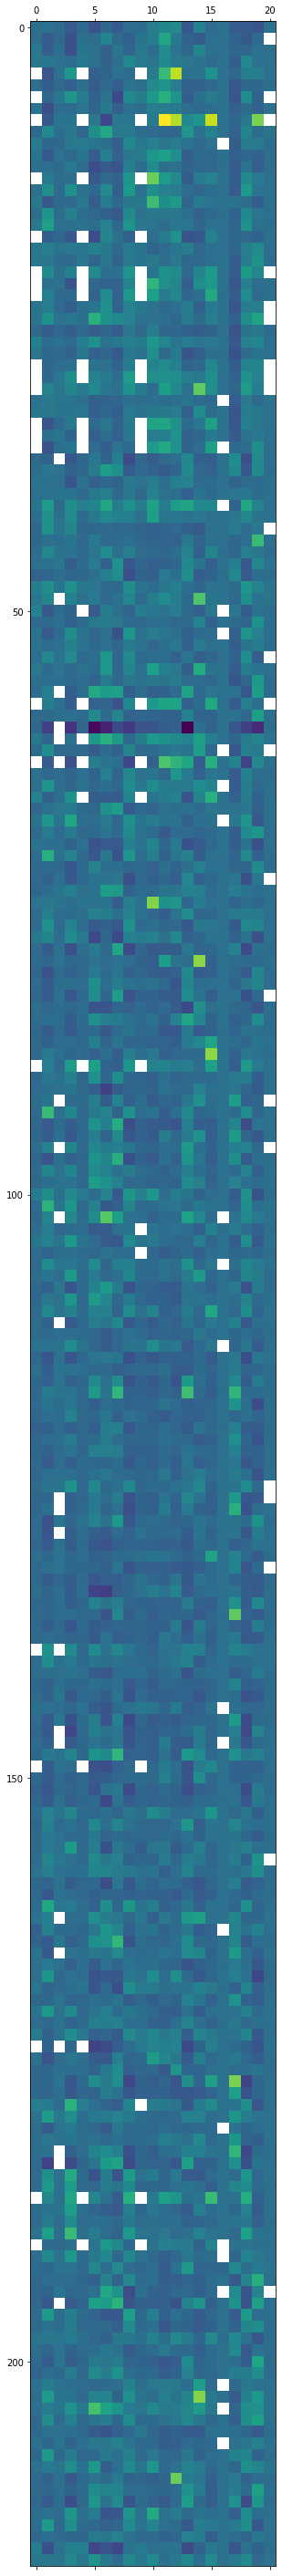

In [25]:
plt.figure(figsize=(5,50))
plt.matshow(z,fignum=1)

In [26]:
f = pd.DataFrame(np.arange(4796).reshape(218,22))
f[0] = data0[0]
for x in range(1,z.shape[1]):
    f[x] = z[x]
f

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,1.0,-0.203343,-0.052892,-0.328720,-1.076708,-0.339461,-1.440503,-0.496516,-1.042336,-0.263837,...,0.949205,1.082790,-1.209826,0.643763,-0.354193,-0.071162,-1.078875,-0.991246,-1.310961,21
1,2.0,-0.247432,-0.996063,-0.400122,-1.524713,-0.120257,-0.197745,0.839423,-0.397475,-0.786418,...,2.406955,0.400043,-0.713868,-0.964548,-0.148505,-0.077465,-0.649630,-1.104259,-0.340064,43
2,4.0,0.189571,-0.942891,-0.116440,-1.563450,0.124485,-0.033290,-0.836389,0.148677,-0.590447,...,1.193086,0.015847,-0.501432,0.944315,-0.107113,-0.080376,-0.501344,-0.575911,0.003576,65
3,5.0,0.287060,0.271171,-0.018005,-0.200815,0.284590,-0.021847,-0.679630,-0.110499,1.006299,...,1.139905,0.448989,0.216090,0.063350,-0.355410,-0.073494,-0.896127,0.974357,0.044428,87
4,6.0,NaN,-1.333487,-0.065217,1.794012,NaN,-0.815924,-0.663916,-0.056407,-0.246944,...,3.498543,6.075937,-0.007316,-0.084064,1.483811,-0.068893,-0.465944,0.630257,0.511095,109
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,227.0,-0.182368,-0.034578,-0.311170,1.717523,-0.103898,0.456827,-1.334732,-1.221422,1.606948,...,-0.058548,0.400895,-0.270530,0.046620,-0.194219,-0.068492,-0.818016,1.266505,-0.214926,4707
214,230.0,-0.290344,1.948499,-0.414330,1.345487,-0.305962,-0.373094,-0.727945,-0.448787,1.212494,...,-0.106074,-0.289421,-1.082119,0.513262,0.242217,-0.056516,0.430144,1.385581,-1.232261,4729
215,231.0,-0.496024,-0.141938,-0.348746,-0.532637,-0.551058,0.432326,0.283873,0.757055,-0.083640,...,-0.706609,-0.476300,0.751306,0.546619,-0.880355,-0.069483,-0.233685,-0.618700,0.303323,4751
216,233.0,0.484958,-1.486779,-0.019668,0.602316,0.618954,-1.935481,-1.320978,-1.856458,-0.013186,...,0.065019,0.041235,-1.721405,-0.727913,0.317888,-0.070501,-1.253402,-0.033313,-0.668497,4773


In [27]:
f.to_csv('New_ionStats.csv')